In [1]:
import sys
sys.path.append("..")

import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# anchor boxes
YOLO_ANCHORS = np.array(
    [(10, 13), (16, 30), (33, 23), 
     (30, 61), (62, 45), (59, 119),
     (116, 90), (156, 198), (373, 326)], np.float32)

YOLO_ANCHORS_MASKS = np.array([[6, 7, 8], 
                               [3, 4, 5],
                               [0, 1, 2]]) 


YOLO_ANCHORS

array([[ 10.,  13.],
       [ 16.,  30.],
       [ 33.,  23.],
       [ 30.,  61.],
       [ 62.,  45.],
       [ 59., 119.],
       [116.,  90.],
       [156., 198.],
       [373., 326.]], dtype=float32)

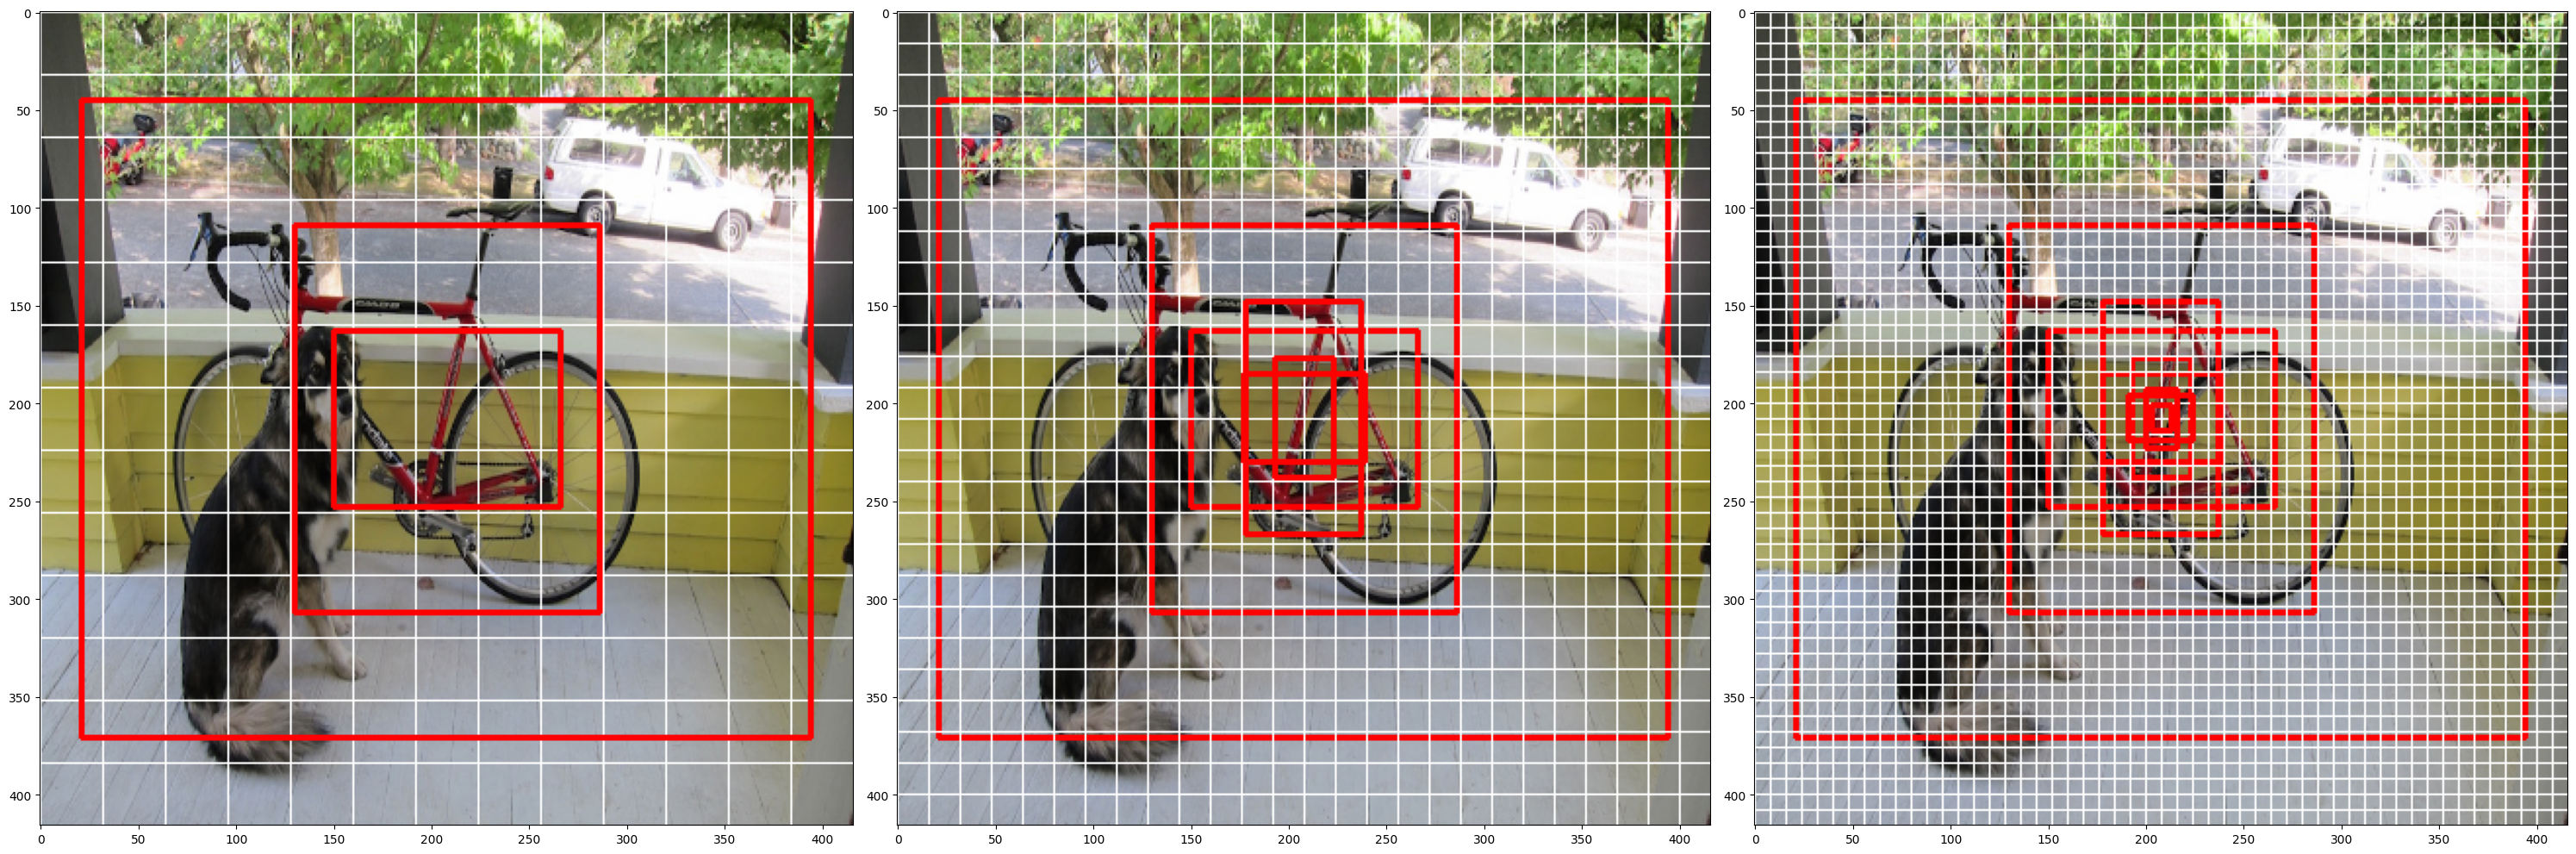

In [3]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 30))
f.subplots_adjust(hspace = .2, wspace = .05)
axs = (ax1, ax2, ax3)
image = cv2.imread("../data/dog.jpg") # 載入圖像
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (416, 416))
    
for i, anchor_idxs in enumerate(YOLO_ANCHORS_MASKS):
    #image = np.zeros((416, 416, 3), dtype=np.uint8)
    
    grid_size = 32 // pow(2, i)
    grid_color = [255, 255, 255] # (255,255,255)

    # Plot grid box
    dx, dy = (grid_size, grid_size)
    image[:,::dy,:] = grid_color
    image[::dx,:,:] = grid_color
    
    for idx in anchor_idxs:
        anchor = YOLO_ANCHORS[idx]
        cx,cy= 208, 208
        anchor_maxes = (anchor / 2.)
        anchor_mins = -anchor_maxes

        left = int(cx + anchor_mins[0])
        top = int(cy + anchor_mins[1])
        right = int(cx + anchor_maxes[0])
        bottom = int(cy + anchor_maxes[1])

        cv2.rectangle(image, (left, top), (right, bottom), (255,0,0), 2)
    
    axs[i].imshow(image)
f.tight_layout()